<a href="https://colab.research.google.com/github/among5094/AI_lecture/blob/main/3%2C4%EA%B0%95_%EC%86%8C%ED%94%84%ED%8A%B8%EB%B2%A1%ED%84%B0%EB%A8%B8%EC%8B%A0/4%EA%B0%95_%EC%84%9C%ED%8F%AC%ED%8A%B8%EB%B2%A1%ED%84%B0%EB%A8%B8%EC%8B%A0%EC%9C%BC%EB%A1%9C_%EC%9C%A0%EB%B0%A9%EC%95%94_%EC%98%88%EC%B8%A1_%EC%98%A4%EB%B2%84_%EC%96%B8%EB%8D%94%ED%94%BC%ED%8C%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4강: 서포트벡터머신으로 유방암 예측

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets #사이킷런(머신러닝 라이브러리)에서 제공하는 자체적인 데이터셋 사용

In [11]:
cancer = datasets.load_breast_cancer() #암 데이터를 데이터셋에서 로드해줌
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
#데이터프레임에서 데이터 불러오기, #만약 feature_names가 없다면 열의 이름이 없어짐
df_cancer['degree'] = cancer.target #타겟 지정, 가장 마지막열에 있음

In [12]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,degree
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
np.unique(df_cancer['degree']) #0과 1로 존재
# 0은 양성 -> 혹은 있는데 위험하지는 않은 정도
# 1은 악성 -> 위험한 상태

array([0, 1])

In [14]:
#값들의 scale이 다르기 때문에, 표준화해주기
#스케일되다"는 특성 또는 데이터를 일정한 범위로 조정하는 것을 의미

from sklearn.preprocessing import StandardScaler # preprocessing 전처리 라이브러리 -> 표준화 기능 제공
SS = StandardScaler() #객체생성
cancer_scaled=SS.fit_transform(cancer.data)
cancer_scaled #스케일된 데이터 생성

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [15]:
input_cancer = cancer_scaled #스케일된 데이터를 train데이터로
output_cancer = df_cancer['degree'] #정답데이터는 output으로 넣어주기

In [16]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(input_cancer, output_cancer)

# kernel, 커널에 대해

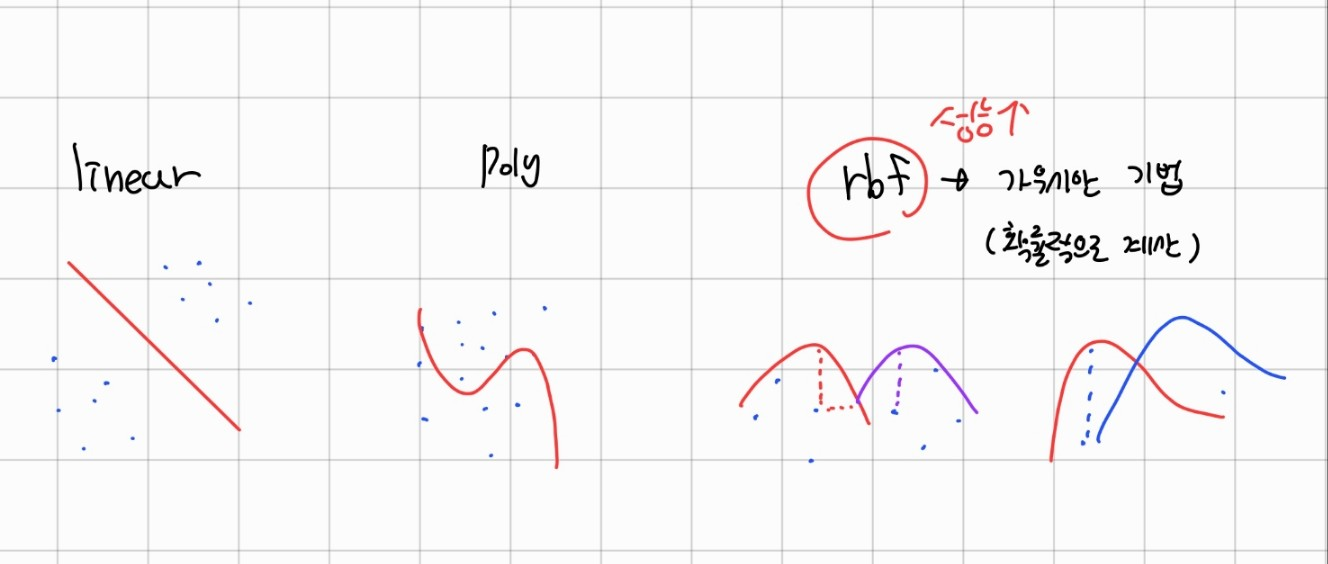

In [31]:
from sklearn import svm #서포트 벡터 머신 임포트

svc = svm.SVC(kernel='linear', C=100) #kernel:  가중치를 변경해주는 함수
svc2 = svm.SVC(kernel='poly', C=100)#C값이 높아질수록 예이를 허용하지 않음, 0.1,1,100
svc3 = svm.SVC(kernel='rbf', C=100)  #C=1로해서 예외를 허용하지 않고 확실하게 해보기
#C=100은 진짜 존나 확실함 -> 이렇게 했을 때, 예외를 허용하지 않았기 때문에 train데이터는 1.0(100%정확도)이 나옴


In [32]:
 #학습시키기
svc.fit(train_input, train_output)
svc2.fit(train_input, train_output)
svc3.fit(train_input, train_output)

SVC(C=100)

In [33]:
# kernel='linear'일 때,
svc.score(train_input, train_output), svc.score(test_input, test_output)
#결과를 보면 상당히 높음.

(0.9976525821596244, 0.951048951048951)

In [34]:
# kernel='poly'일 때,
svc2.score(train_input, train_output), svc2.score(test_input, test_output)
#결과를 보면 82%의 정확도, 85%의 정확도임

(0.9976525821596244, 0.972027972027972)

In [36]:
# kernel='rdf'일 때,
svc3.score(train_input, train_output), svc3.score(test_input, test_output)
#결과를 보면 95%의 정확도, 95%의 정확도임
# => 확실히 linear과 rdf가 정확도가 높음

(1.0, 0.965034965034965)

### 과대적합, 과적합, 오버피팅(Overfitting)

- train 정확도는 매우 높은데, test 정확도가 점점 떨어지는 경우
- 교과서는 잘 봤는데 시험은 계속 못보는 경우
- 심하게 공부만 열시미 한거임
- ChatGPT: 모델이 훈련 데이터에 너무 과도하게 적합되어 다른 데이터에 대한 일반화 능력이 떨어지는 현상
- 그러나 실제로 과적합이 더 큰 문제를 야기함.( 실제로 우리가 사용한 데이터의 정확도는 매우 높지만 실제로 사용할 때는 정확도가 굉장히 낮아져서 쓸모가 없어짐)

### 과소적합, 언더피팅(underfitting)
커널이 poly일 때, train이든 test이든 전부 85%로 매우 낮았다. 이런 것을 언더피팅이라고 함  

- 학습이 덜 된 것임. 이럴 때는 커널을 바꾸거나 하이퍼파라미터인 C값을 바꾸면


## 결론
- 우리는 오버피팅, 언더피팅 둘 다 막아야하기 때문에 하이퍼파라미터 C를 잘 조절하고, 더 적합한 커널을 사용해야한다.
- rdf 정확도 높아서 좋지만 약간의 정확도를 포기하더라도 linear를 선택해주는 것이 좋다. (당장의 데이터는 낮을지라도 실제로 사용될 때는 유연하고 융통성있게 사용될 수 있기 때문. )

- 유연함과 융통성을 발휘할 수 있는 건 하이퍼 파라미터임.
- train과 test 둘 다 높은 값이 나와야됨

# 과대적합 과소적합 정리

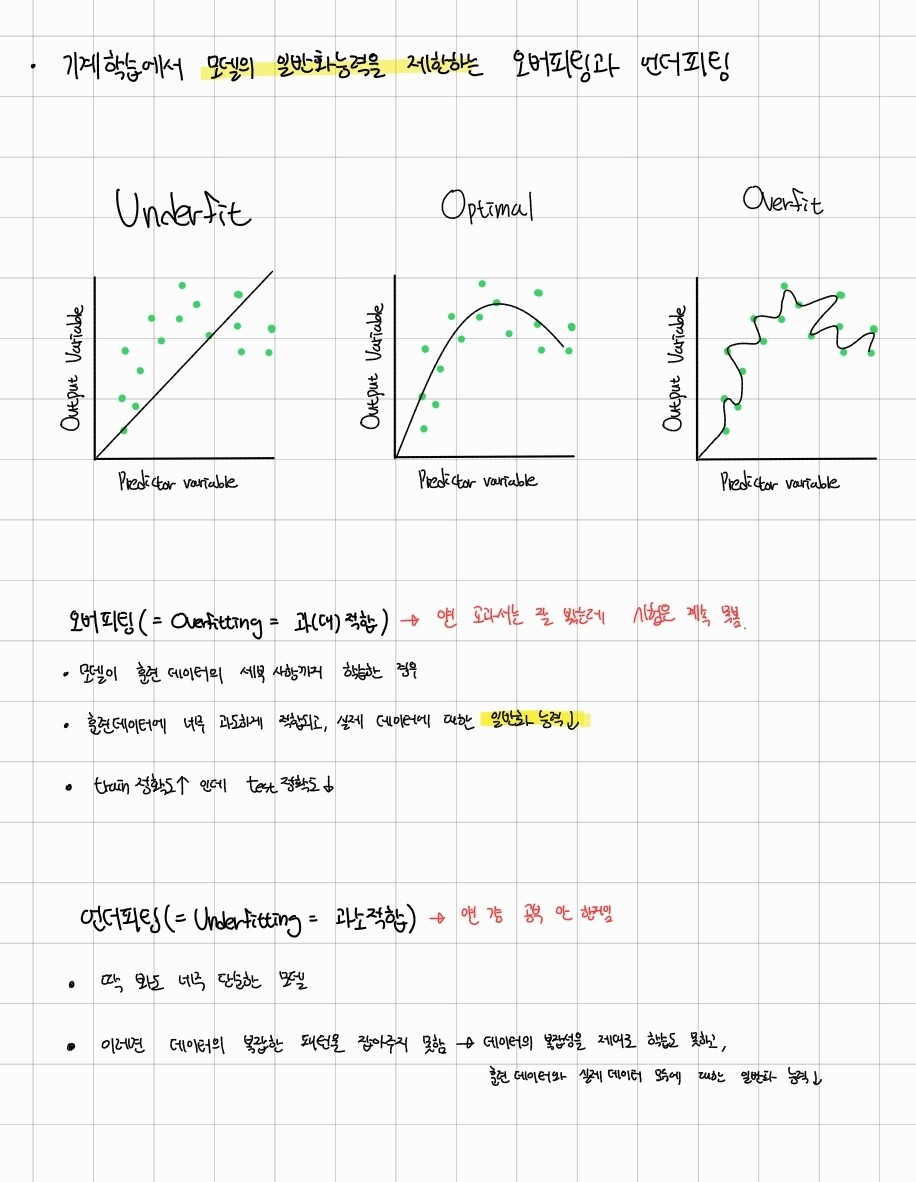